# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing kmeans clustering model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reading data into notebook

In [3]:
data = pd.read_excel('Nighttime_and_population_data.xlsx')
data.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633


# Feature engineering

In [4]:
# creating population density feature.

data['population density'] = data['Population']/data['AREA']
data.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,population density
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780,13569.511923
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108,7436.035102
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149,379.034030
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846,391.593936
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633,645.096740


# Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = data[['Average Nighttime mean', 'population density']]

> We used the two most relevant features for the clustering model, `Avearge Nighttime mean` and `Population density`.

In [6]:
# instantiating standardscaler for scaling choosen features

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.08741393,  4.16368693],
       [ 0.4904068 ,  2.1226013 ],
       [-0.26357502, -0.2258128 ],
       ...,
       [-0.29139817, -0.28961479],
       [-0.29532429, -0.30925259],
       [-0.30001705, -0.32184186]])

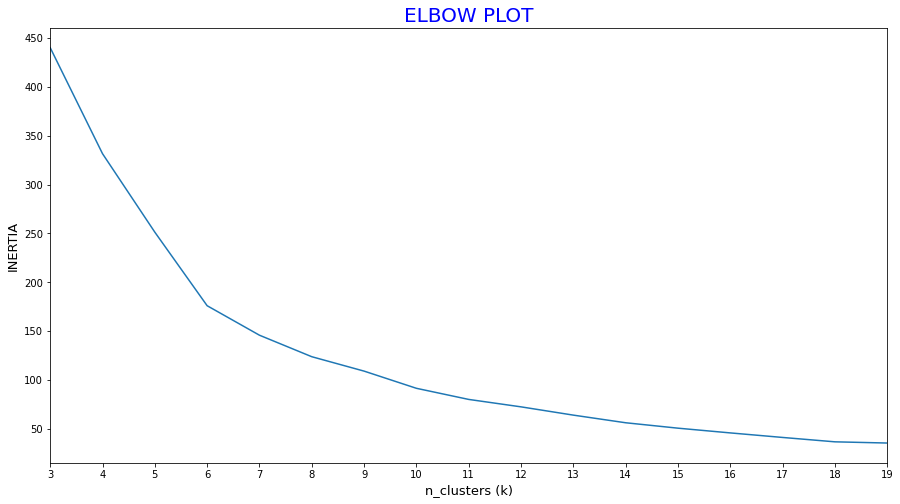

In [7]:
# creating an elbow plot to determine the optimal k, number of clusters for the data.

inertia_scores = []
K = np.arange(3, 20)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)
    

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(K, inertia_scores)
plt.ylabel('INERTIA', fontsize=13)
plt.xlabel('n_clusters (k)', fontsize=13)
plt.title('ELBOW PLOT', fontsize=20, color='blue')
ax.set_xlim(3, 19)
ax.set_xticks(K);

> Although the optimal clusters for the data suggested by the elbow plot seems to fall around 13, we choose to settle for **`5 clusters`**, the reason behind this is to avoid ambiguity in clustering as having too much clusters would mean resources would be pulled for several sections. This would require more labour and different procedures in installing the solar panels at strategic positions. 

# Building the model

In [8]:
# using 5 clusters to build a KMeans model

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)
data['clusters'] = labels
data.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,population density,clusters
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780,13569.511923,2
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108,7436.035102,4
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149,379.034030,0
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846,391.593936,0
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633,645.096740,0


In [9]:
# centroids scaled by the standard scaler and the clusters

kmeans.cluster_centers_, np.unique(kmeans.labels_)

(array([[-0.23387389, -0.202038  ],
        [ 5.91073544,  0.94918099],
        [ 2.51700706,  4.69165976],
        [ 5.33641219, 10.22962155],
        [ 1.22482153,  0.88387885]]),
 array([0, 1, 2, 3, 4]))

In [10]:
#unscaled centroids

scaled_centroids = kmeans.cluster_centers_
centroids =scaler.inverse_transform(scaled_centroids)
centroids

array([[1.62788842e-01, 4.50477459e+02],
       [1.53227186e+01, 3.90989871e+03],
       [6.94973979e+00, 1.51560740e+04],
       [1.39057530e+01, 3.17976886e+04],
       [3.76167024e+00, 3.71366534e+03]])

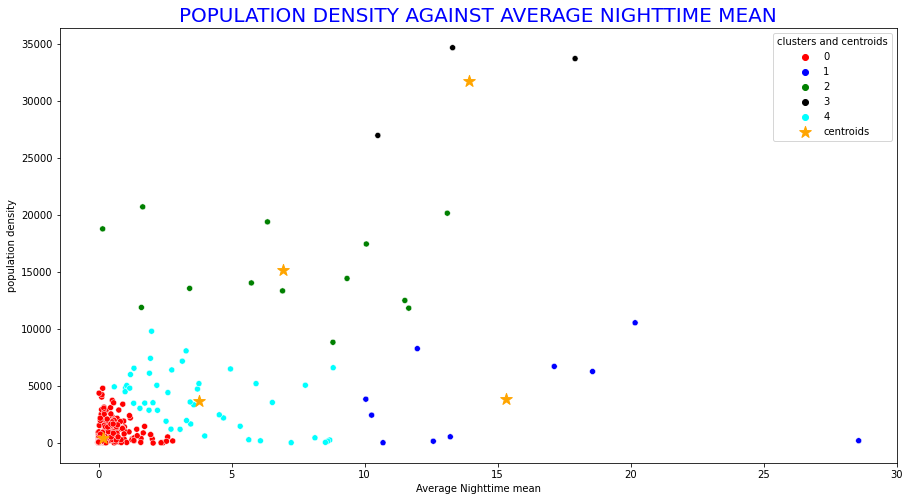

In [11]:
# plot of population density against Average nighttime mean

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Average Nighttime mean', y='population density',
                data=data, hue='clusters', ax=ax, palette=['red', 'blue', 'green', 'black', 'cyan'])
ax.scatter(x=centroids[:,0], y=centroids[:,1], c='orange', label='centroids', marker='*', s=150)
plt.legend(title='clusters and centroids')
ax.set_title('population density against Average nighttime mean'.upper(), fontsize=20, color='blue');

> From the clusters displayed above, our order of priority would be as follows;

* **cluster 0 (red) > cluster 4 (cyan) > cluster 2 (green) > cluster 3 (black) > cluster 1 (blue)**

> These clusters generated by the model would be renamed based on how much luminuous intensity they emit.<br>
> From least luminuous intensity to the most;

* **low intensity, moderately low intensity, medium intensity, moderate high intensity, high intensity**

In [12]:
# using the silhouette score metrics to check for the performance of the model.

sil_score = silhouette_score(X, labels)
print(f'The Silhouette score of the model is: {sil_score}')

The Silhouette score of the model is: 0.8178367023324421


> Having a score tending towards +1 is very favourable, signifying that the clusters are properly segemented and have no overlapping layers.

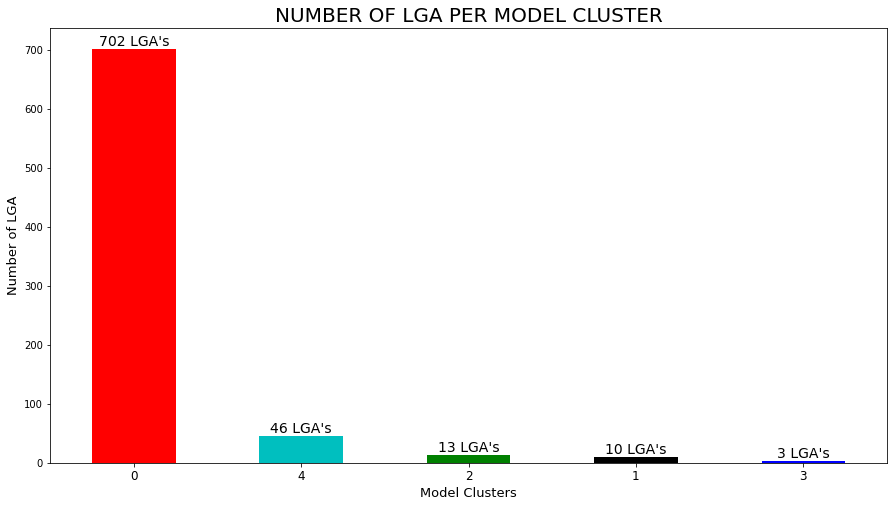

In [13]:
# the value counts of the clusters in the data represented in a bar chart

data_counts = data['clusters'].value_counts()
data_counts.plot(kind='bar', figsize=(15,8), color=['r', 'c', 'g', 'k', 'b'])
plt.title('NUMBER OF LGA PER MODEL CLUSTER', fontsize=20)
plt.ylabel('Number of LGA', fontsize=13)
plt.xlabel('Model Clusters', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
for x, y in zip(np.arange(len(data_counts)), data_counts[:]):
    plt.text(x, y, str(y)+" LGA's" ,fontsize=14, ha='center', va='bottom');

# Labelling the clusters with appropriate names

In [14]:
data.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,population density,clusters
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780,13569.511923,2
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108,7436.035102,4
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149,379.034030,0
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846,391.593936,0
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633,645.096740,0


In [15]:
# creating a NightClass function to return the labels of the clusters

class_labels = ['low_intensity', 'moderately_low_intensity', 'medium_intensity', 'moderate_high_intensity', 'high_intensity']

def NightClass(cluster):
    """
    This function takes an integer cluster as argument and returns its appropraite name 
    showen in the class_labels list above.
    """
    cluster = int(cluster)
    if cluster == 0:
        return class_labels[0]
    elif cluster == 1:
        return class_labels[-1]
    elif cluster == 2:
        return class_labels[2]
    elif cluster == 3:
        return class_labels[3]
    elif cluster == 4:
        return class_labels[-4]
    else:
        return None

> The `NightClass` function is responsible for mapping the model's clusters to suite our labels. The mapping follows the table below;

| Model Clusters     | Cluster Labels  |
|--------------------|-----------------|
|  0                 | low_intensity   |
|  4                 | moderately_low_intensity |
|  2                 | medium_intensity|
|  3                 | moderate_high_intensity  |
|  1                 | high_intensity  |

In [16]:
data['cluster labels'] = data['clusters'].apply(NightClass)
data.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,population density,clusters,cluster labels
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780,13569.511923,2,medium_intensity
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108,7436.035102,4,moderately_low_intensity
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149,379.034030,0,low_intensity
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846,391.593936,0,low_intensity
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633,645.096740,0,low_intensity


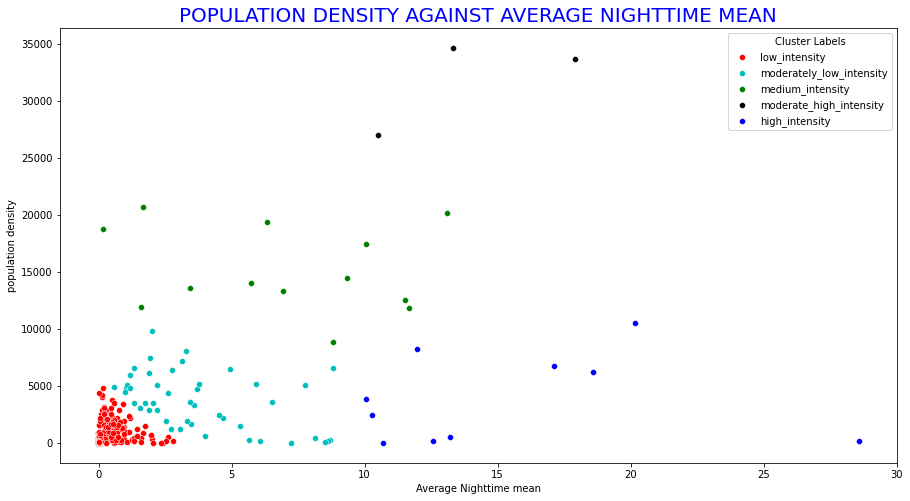

In [17]:
# plot of population density against Average nighttime mean for labelled clusters

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='Average Nighttime mean', y='population density', 
                data=data[data['cluster labels']=='low_intensity'], color='r', label='low_intensity', ax=ax)
sns.scatterplot(x='Average Nighttime mean', y='population density', 
                data=data[data['cluster labels']=='moderately_low_intensity'], 
                label='moderately_low_intensity', color='c', ax=ax)
sns.scatterplot(x='Average Nighttime mean', y='population density', 
                data=data[data['cluster labels']=='medium_intensity'], label='medium_intensity', color='g', ax=ax)
sns.scatterplot(x='Average Nighttime mean', y='population density', 
                data=data[data['cluster labels']=='moderate_high_intensity'], 
                label='moderate_high_intensity', color='k', ax=ax)
sns.scatterplot(x='Average Nighttime mean', y='population density', 
                data=data[data['cluster labels']=='high_intensity'], label='high_intensity', color='b', ax=ax)

plt.legend(title='Cluster Labels', fontsize=10)
ax.set_title('population density against Average nighttime mean'.upper(), fontsize=20, color='blue');

> Areas of top most priority are listed in order from top to bottom;

* low_intensity
* moderately_low_intensity
* medium_intensity
* moderate_high_intensity
* high_intensity

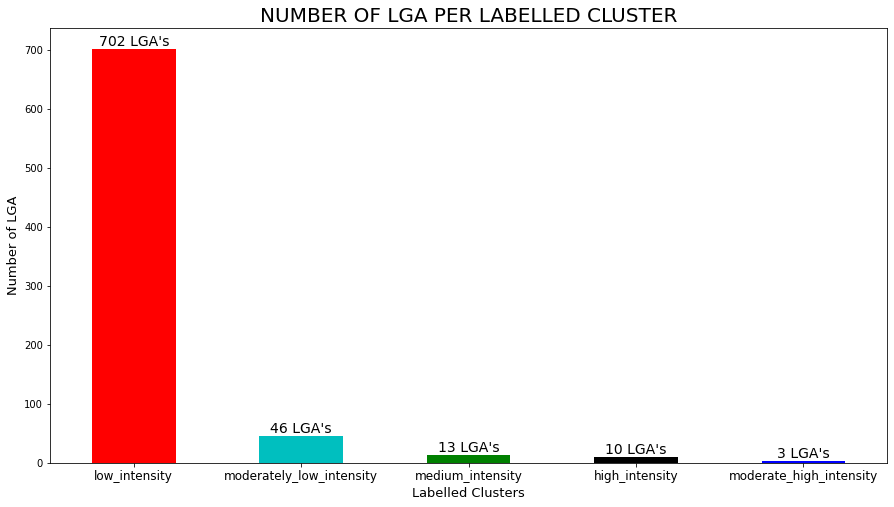

In [18]:
# the value counts of the clusters with their appropraite labels in the data represented in a bar chart

data_counts = data['cluster labels'].value_counts()
data_counts.plot(kind='bar', figsize=(15,8), color=['r', 'c', 'g', 'k', 'b'])
plt.title('NUMBER OF LGA PER LABELLED CLUSTER', fontsize=20)
plt.ylabel('Number of LGA', fontsize=13)
plt.xlabel('Labelled Clusters', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
for x, y in zip(np.arange(len(data_counts)), data_counts[:]):
    plt.text(x, y, str(y)+" LGA's" ,fontsize=14, ha='center', va='bottom');

# Saving files to csv

In [19]:
# using the .to_csv method, the data is saved under the file name 'Nighttime Clusters.csv'

data.to_csv('Nighttime Clusters.csv')

In [20]:
class_labels

['low_intensity',
 'moderately_low_intensity',
 'medium_intensity',
 'moderate_high_intensity',
 'high_intensity']

In [21]:
# partitioning each cluster into its own csv file for ease in visualization and analysis.

for label in class_labels:
    df = data.loc[data['cluster labels']==label]
    df.to_csv(label+'.csv')